# Unit 3 Capstone - World Migration

In [168]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import time

## Data
Dataset found at https://www.kaggle.com/fernandol/countries-of-the-world <br>
from 2013 US government data found at https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

In [103]:
# US Government data on countries fo the world
countries_raw = pd.read_csv('~/Desktop/Data_Science/countries.csv', decimal=',')

In [104]:
countries_raw['Region'] = countries_raw['Region'].str.replace('  ','')

In [105]:
countries_raw.shape

(227, 20)

In [106]:
countries_raw.isnull().sum(axis=0)

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [107]:
countries = countries_raw.dropna()

In [108]:
countries.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678


In [8]:
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [9]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
countries.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [11]:
countries['Population'] = countries['Population'].astype(np.float64)
countries['Area (sq. mi.)'] = countries['Area (sq. mi.)'].astype(np.float64)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Numeric Variables

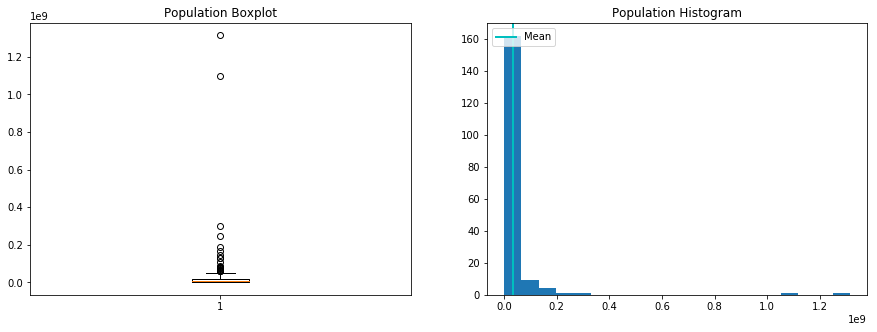

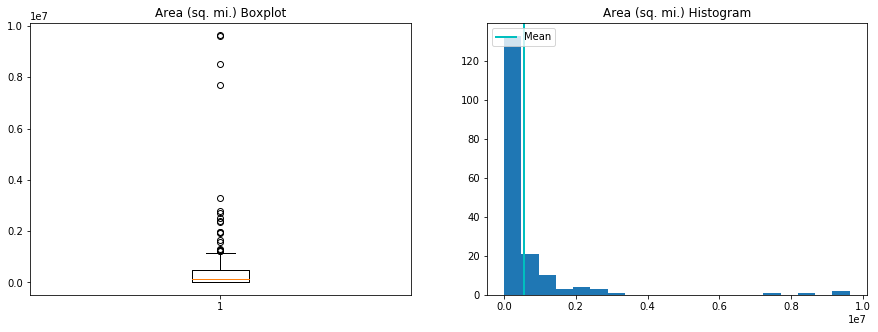

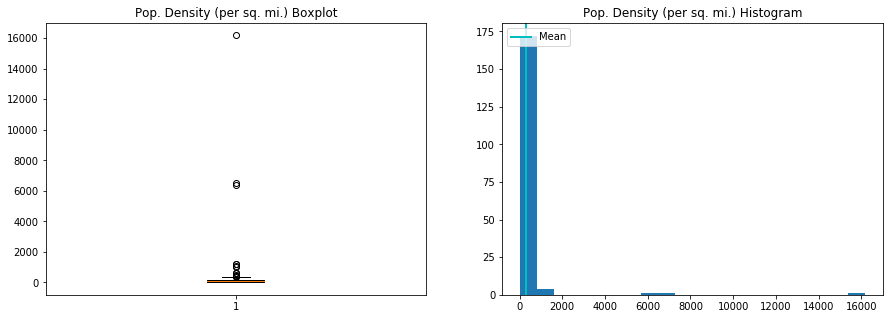

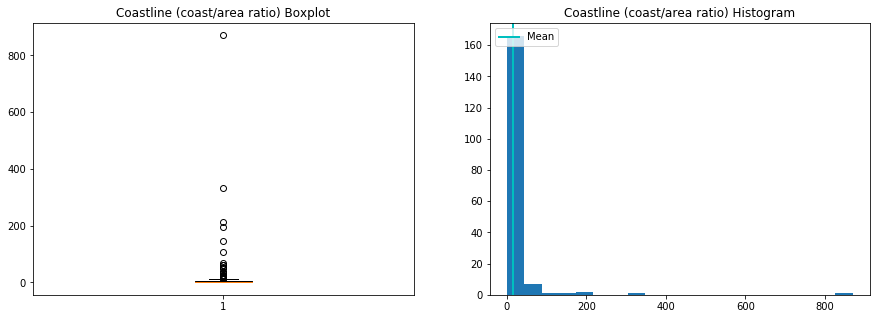

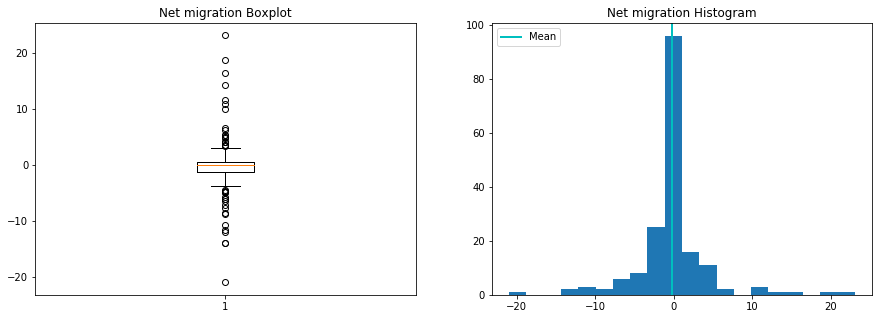

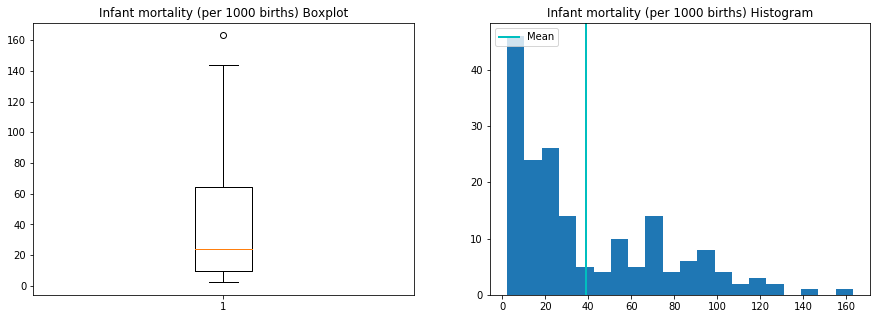

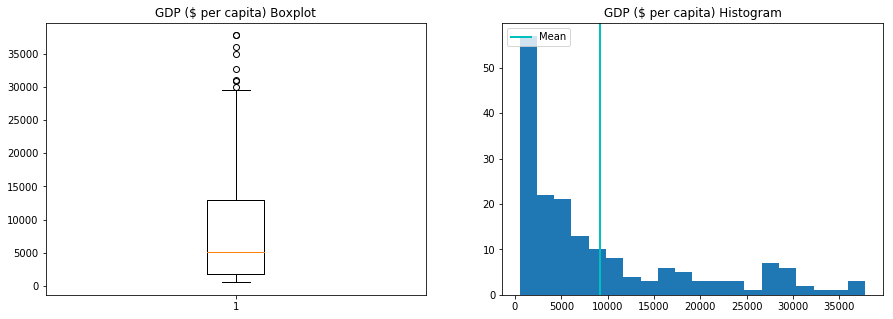

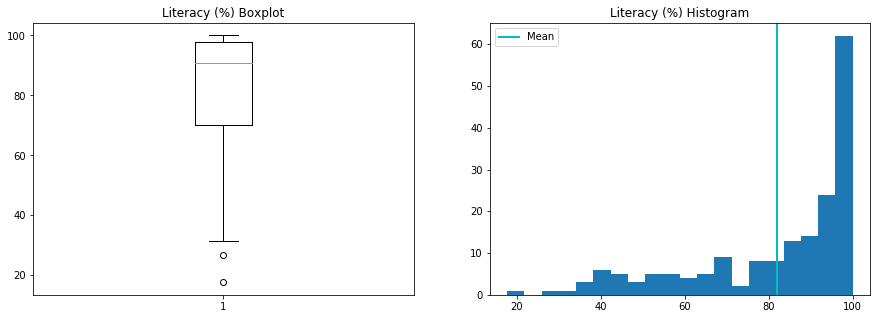

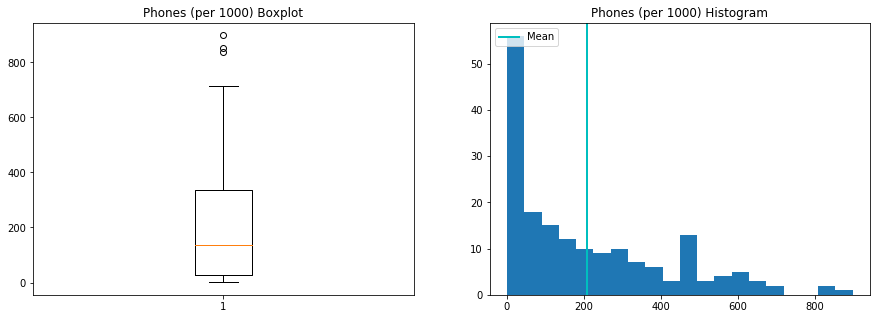

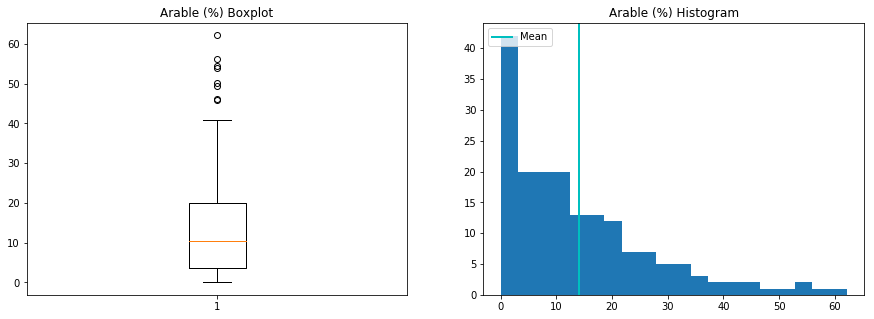

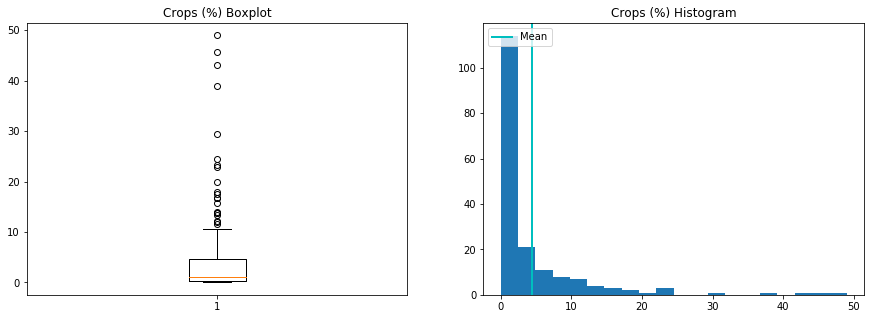

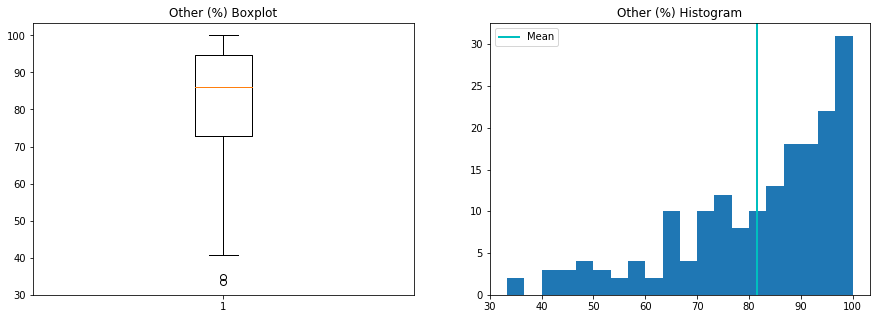

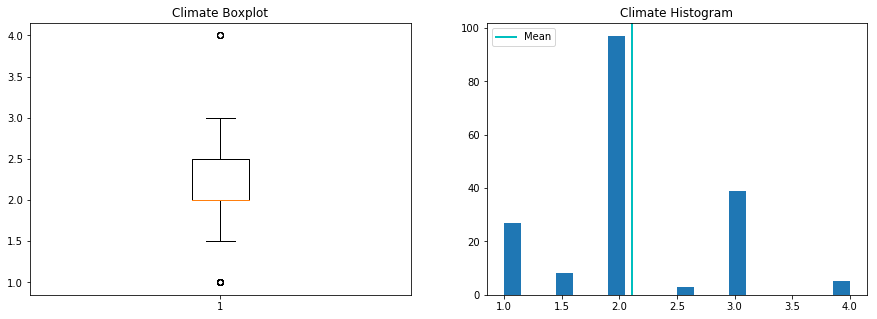

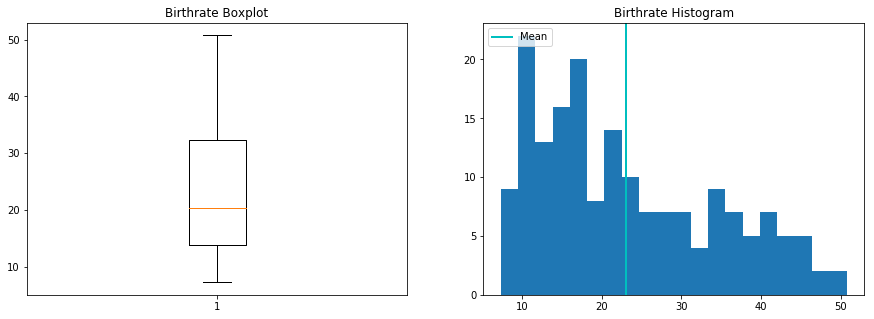

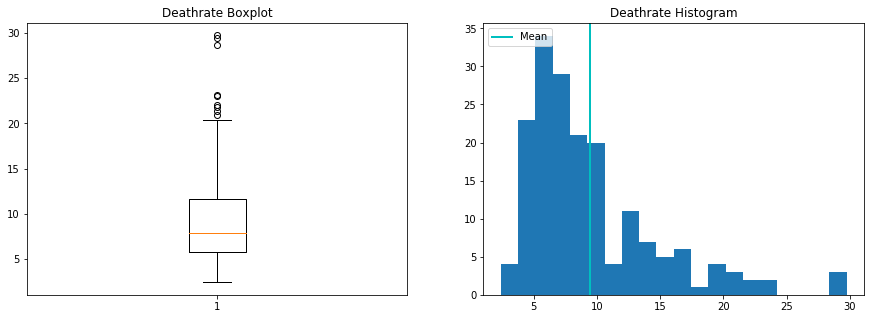

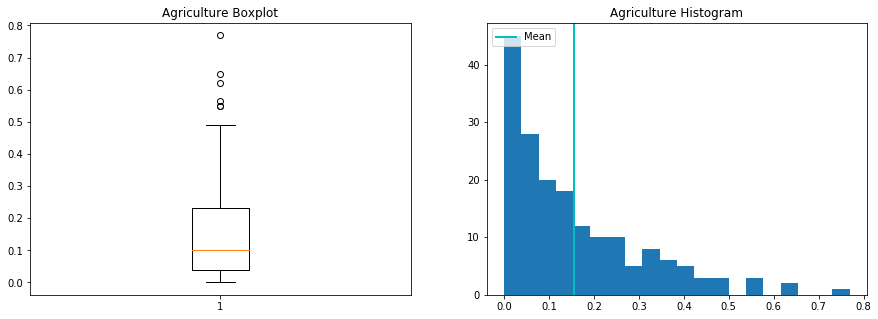

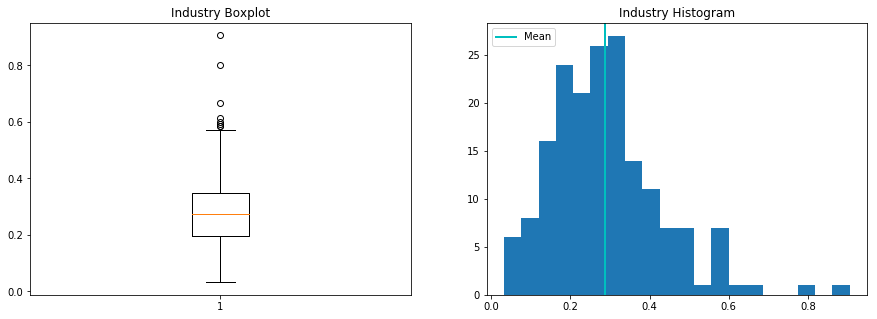

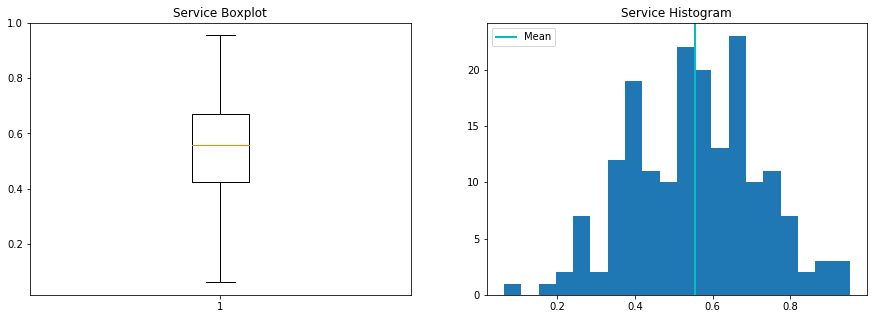

In [12]:
from pandas.api.types import is_numeric_dtype

# Visualize distributions of each column
for column in countries:
    
    if is_numeric_dtype(countries[column]):
    
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.boxplot(countries[column].dropna(how = 'any'))
        plt.title(column + ' Boxplot')

        plt.subplot(1, 2, 2)
        plt.hist(countries[column].dropna(how = 'any'), bins=20)
        plt.axvline(countries[column].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
        plt.legend(loc='upper left') 
        plt.title(column + ' Histogram')

        plt.show()


In [114]:
countries[countries['Net migration'] > 15]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
166,Qatar,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197


In [115]:
countries[countries['Net migration'] < -15]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
136,"Micronesia, Fed. St.",OCEANIA,108004,702,153.9,870.66,-20.99,30.21,2000.0,89.0,114.8,5.71,45.71,48.58,2.0,24.68,4.75,0.289,0.152,0.559


In [15]:
countries[countries['GDP ($ per capita)'] > 35000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
22,Bermuda,NORTHERN AMERICA,65773.0,53.0,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
154,Norway,WESTERN EUROPE,4610820.0,323802.0,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
214,United States,NORTHERN AMERICA,298444215.0,9631420.0,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


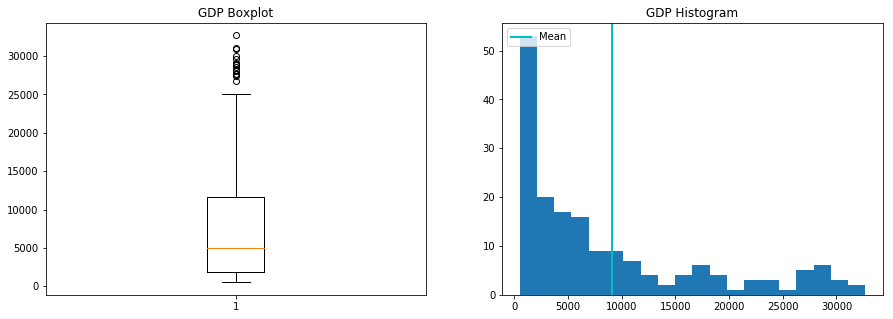

In [111]:
gdp_smooth = countries[countries['GDP ($ per capita)'] < 35000]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(gdp_smooth["GDP ($ per capita)"].dropna(how = 'any'))
plt.title('GDP Boxplot')

plt.subplot(1, 2, 2)
plt.hist(gdp_smooth['GDP ($ per capita)'].dropna(how = 'any'), bins=20)
plt.axvline(countries['GDP ($ per capita)'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('GDP Histogram')

plt.show()

In [113]:
countries['GDP ($ per capita)'].mean()

9125.698324022347

In [16]:
countries[countries['Population'] > 1e9]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1.313974e+09,9596960.0,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1.095352e+09,3287590.0,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.4,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538


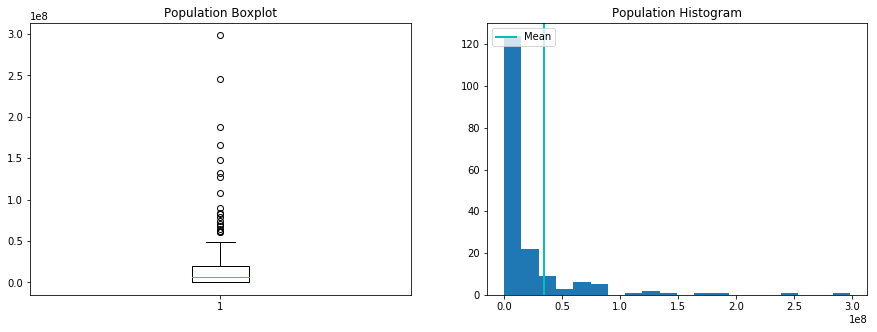

In [109]:
pop_smooth = countries.loc[countries['Population'] < 1e9]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(pop_smooth["Population"].dropna(how = 'any'))
plt.title('Population Boxplot')

plt.subplot(1, 2, 2)
plt.hist(pop_smooth['Population'].dropna(how = 'any'), bins=20)
plt.axvline(countries['Population'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Population Histogram')

plt.show()

In [112]:
countries['Population'].mean()

34214149.51955307

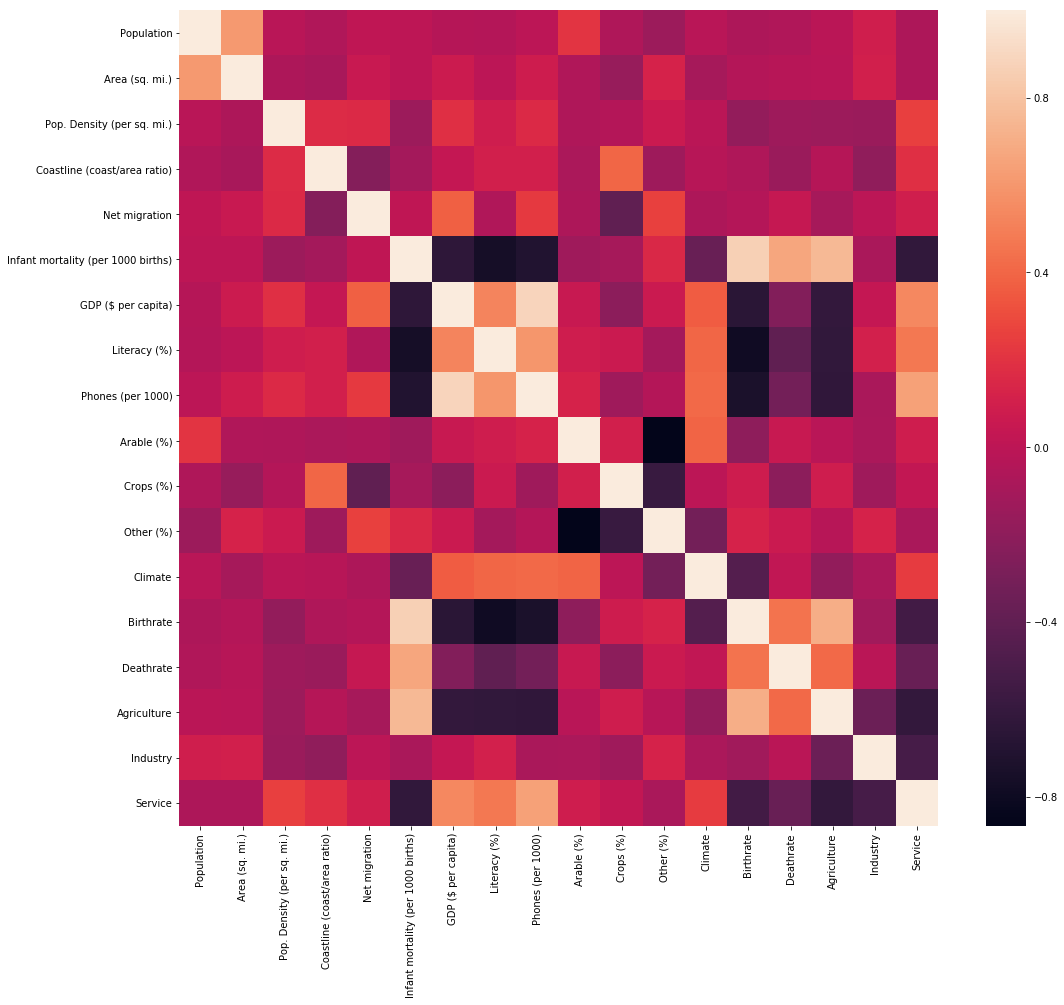

In [19]:
corr = countries.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Categorical Variables

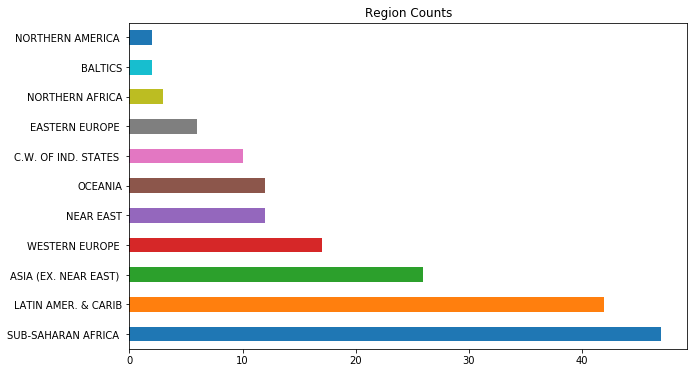

SUB-SAHARAN AFRICA       47
LATIN AMER. & CARIB      42
ASIA (EX. NEAR EAST)     26
WESTERN EUROPE           17
NEAR EAST                12
OCEANIA                  12
C.W. OF IND. STATES      10
EASTERN EUROPE            6
NORTHERN AFRICA           3
BALTICS                   2
NORTHERN AMERICA          2
Name: Region, dtype: int64


In [20]:
plt.figure(figsize=(10, 6))
plt.title('Region Counts')
pd.value_counts(countries['Region']).plot.barh()
plt.show()

print(countries['Region'].value_counts())

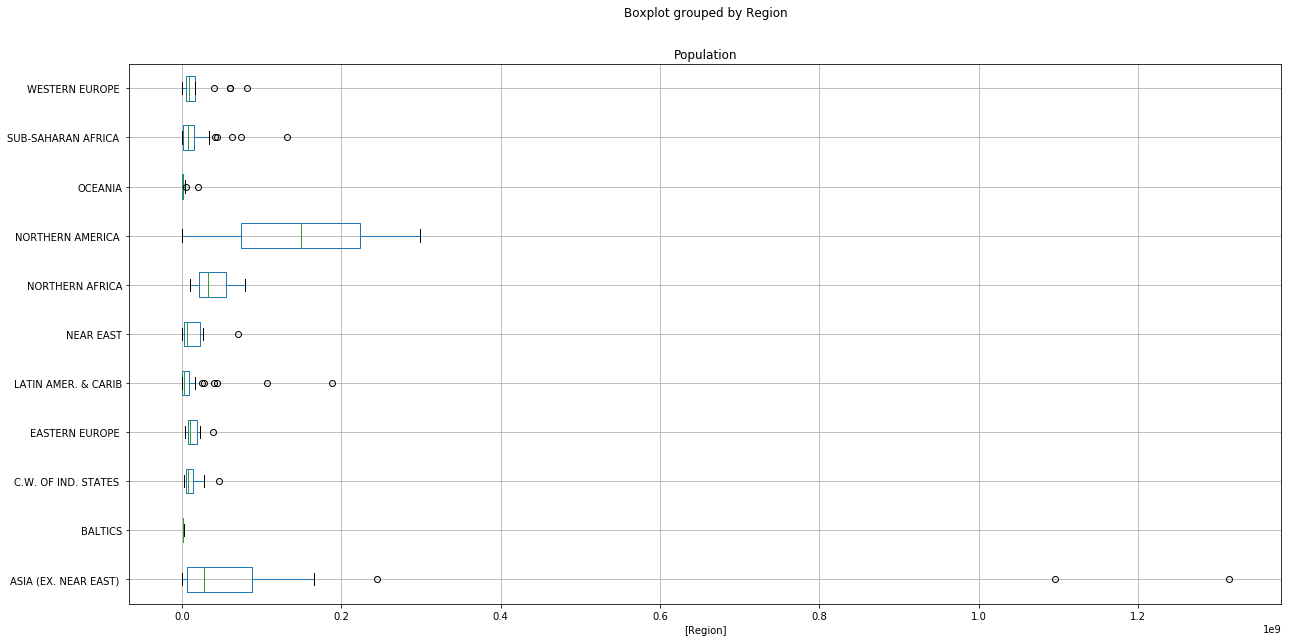

In [21]:
#popuation by region
countries[['Region', 'Population']].boxplot(by='Region', figsize=(20,10), vert=False)
plt.show()

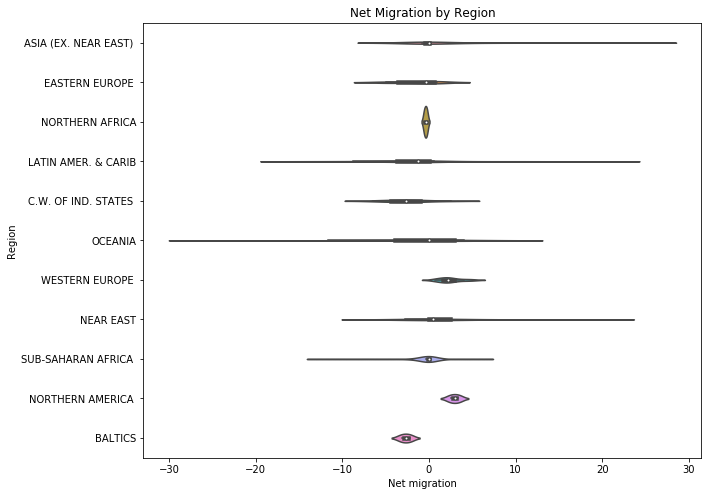

In [22]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Net migration", y="Region", data=countries)
plt.title("Net Migration by Region")
plt.show()

In [23]:
countries = pd.get_dummies(countries, columns=['Region'])

In [24]:
countries.columns

Index(['Country', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Region_ASIA (EX. NEAR EAST) ', 'Region_BALTICS',
       'Region_C.W. OF IND. STATES ', 'Region_EASTERN EUROPE ',
       'Region_LATIN AMER. & CARIB', 'Region_NEAR EAST',
       'Region_NORTHERN AFRICA', 'Region_NORTHERN AMERICA ', 'Region_OCEANIA',
       'Region_SUB-SAHARAN AFRICA ', 'Region_WESTERN EUROPE '],
      dtype='object')

# Can we predict net migration?

In [25]:
corr = countries.corr()
migration_corr = corr['Net migration']
print(migration_corr.sort_values(ascending=False))

Net migration                         1.000000
GDP ($ per capita)                    0.378790
Other (%)                             0.257420
Phones (per 1000)                     0.232446
Region_NEAR EAST                      0.187972
Region_WESTERN EUROPE                 0.179783
Pop. Density (per sq. mi.)            0.161705
Region_ASIA (EX. NEAR EAST)           0.146573
Service                               0.091498
Region_NORTHERN AMERICA               0.070819
Area (sq. mi.)                        0.052730
Deathrate                             0.042805
Infant mortality (per 1000 births)    0.013053
Population                            0.010332
Industry                             -0.004402
Region_NORTHERN AFRICA               -0.005147
Region_SUB-SAHARAN AFRICA            -0.032431
Birthrate                            -0.035102
Region_EASTERN EUROPE                -0.046256
Literacy (%)                         -0.053788
Region_BALTICS                       -0.055830
Arable (%)   

The numerical variables showing strongest correlation with Net Migration are the following: GDP, Crops land use, Phone density, Other land use and Population Density <br>
Let's plot those relationships.

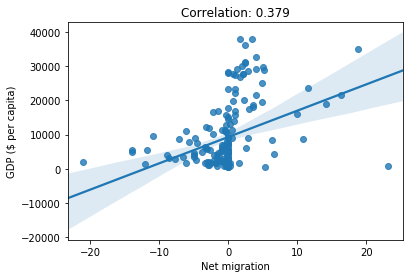

In [26]:
sns.regplot(x='Net migration', y='GDP ($ per capita)', data=countries)
plt.title("Correlation: %0.3f" % (migration_corr['GDP ($ per capita)']))
plt.show()

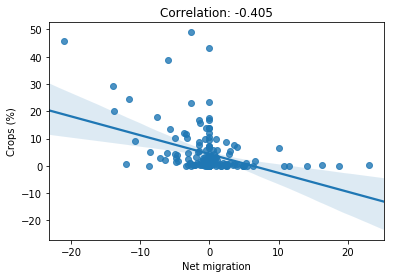

In [27]:
sns.regplot(x='Net migration', y='Crops (%)', data=countries)
plt.title("Correlation: %0.3f" % (migration_corr['Crops (%)']))
plt.show()

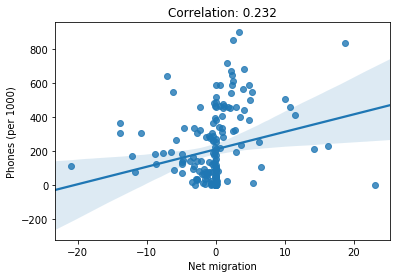

In [28]:
sns.regplot(x='Net migration', y='Phones (per 1000)', data=countries)
plt.title("Correlation: %0.3f" % (migration_corr['Phones (per 1000)']))
plt.show()

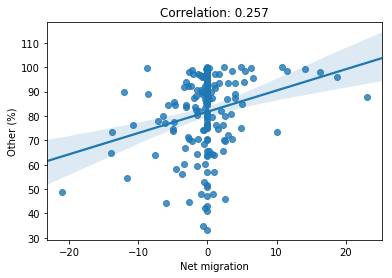

In [29]:
sns.regplot(x='Net migration', y='Other (%)', data=countries)
plt.title("Correlation: %0.3f" % (migration_corr['Other (%)']))
plt.show()

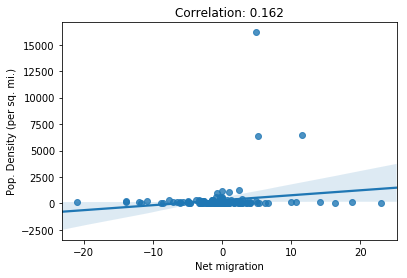

In [30]:
sns.regplot(x='Net migration', y='Pop. Density (per sq. mi.)', data=countries)
plt.title("Correlation: %0.3f" % (migration_corr['Pop. Density (per sq. mi.)']))
plt.show()

The region categories are also showing some correlation to Net migration, most notibly a positive correlation to Western Europe and a negative correlation to Latin America.

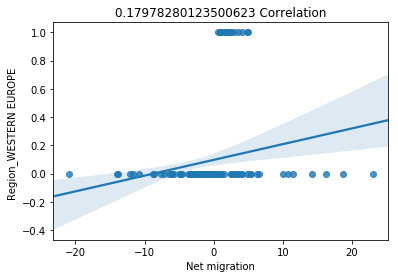

In [31]:
sns.regplot(x='Net migration', y='Region_WESTERN EUROPE ', data=countries)
plt.title("{} Correlation". format(migration_corr['Region_WESTERN EUROPE ']))
plt.show()

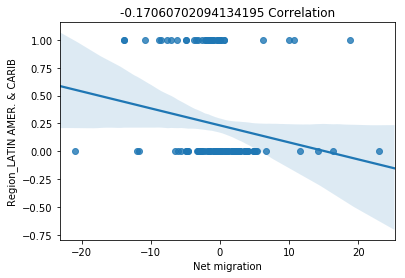

In [32]:
sns.regplot(x='Net migration', y='Region_LATIN AMER. & CARIB', data=countries)
plt.title("{} Correlation". format(migration_corr['Region_LATIN AMER. & CARIB']))
plt.show()

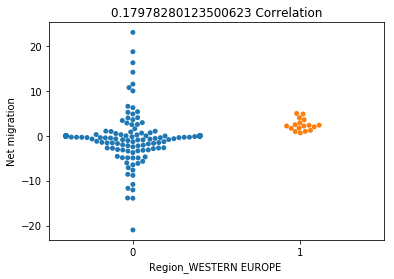

In [33]:
sns.swarmplot(x="Region_WESTERN EUROPE ", y="Net migration", data=countries)
plt.title("{} Correlation". format(migration_corr['Region_WESTERN EUROPE ']))
plt.show()

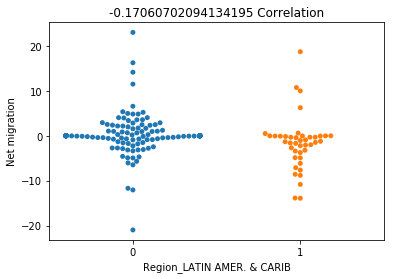

In [34]:
sns.swarmplot(x="Region_LATIN AMER. & CARIB", y="Net migration", data=countries)
plt.title("{} Correlation". format(migration_corr['Region_LATIN AMER. & CARIB']))
plt.show()

### Prepare data for modeling

In [38]:
Y = countries['Net migration']
# remove target variable, unique country names and Region (which was replaced with dummies)
X = countries.drop(['Net migration', 'Country'], 1)

In [39]:
def model_results(model):
    score = cross_val_score(model,X,Y, cv=5)
    print("Cross Validation Scores", score)    
    model.fit(X, Y)
    print('\nR-squared: ', model.score(X, Y))

In [40]:
def model_residuals(model):
    predicted = model.predict(X).ravel()
    residual = Y - predicted
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(residual)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    
    plt.subplot(1, 3, 2)
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    
    plt.subplot(1, 3, 3)
    plt.scatter(predicted, Y)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.axhline(y=0)
    plt.title('Actual vs. Predicted')
    plt.show()
    
    plt.show()

## KNN Regression

In [41]:
# model with default settings
knnr_default = neighbors.KNeighborsRegressor()

In [42]:
model_results(knnr_default)

Cross Validation Scores [-0.42168264  0.09476832 -0.07820205  0.00459257 -0.56686755]

R-squared:  0.311475148897494


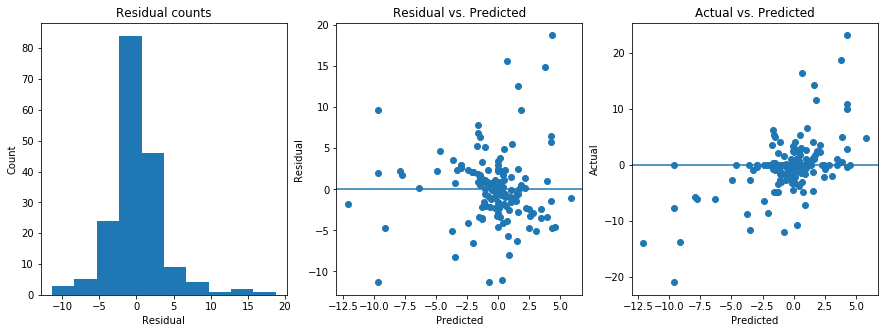

In [43]:
model_residuals(knnr_default)

A knn model using default settings has significant overfitting and poor overall accuracy.

In [44]:
# set parameters for tuning with grid search cv
parameters = {'n_neighbors': [1, 25],
    'weights': ['uniform', 'distance']}
knnr = neighbors.KNeighborsRegressor()
knnr_cv = GridSearchCV(knnr, parameters)

In [45]:
knnr_cv.fit(X, Y)
knnr_cv.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [46]:
# re-define model with optimized parameters
knnr = neighbors.KNeighborsRegressor(n_neighbors=25, weights='distance')

In [47]:
model_results(knnr)

Cross Validation Scores [-0.25878226 -0.05819173 -0.08357927 -0.05274619 -0.15792236]

R-squared:  1.0


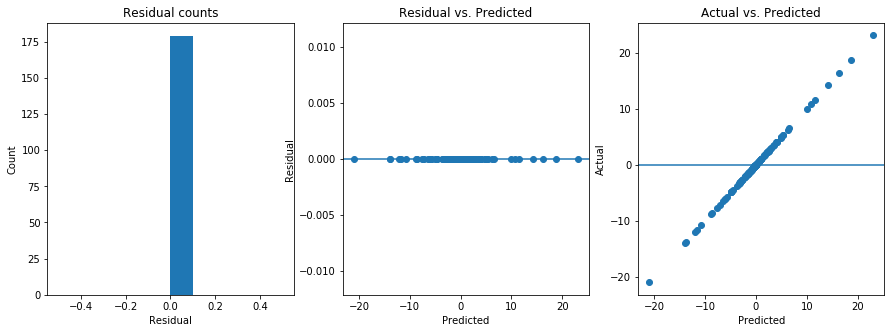

In [48]:
model_residuals(knnr)

This is very impressive accuracy.

## Linear Regression

In [49]:
# linear regression with default settings
regr_default = linear_model.LinearRegression()

In [50]:
model_results(regr_default)

Cross Validation Scores [-0.21054649  0.34780966 -0.1289765   0.05000281 -0.12427821]

R-squared:  0.4395800082453213


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


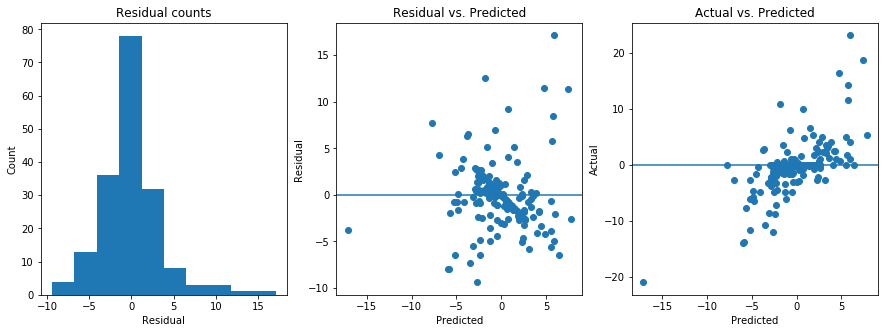

In [51]:
model_residuals(regr_default)

In [52]:
# set parameters for tuning with grid search cv
# defaults normalize=False, fit_intercept=True
parameters = {'normalize': [True, False],
    'fit_intercept': [True, False]}
regr = linear_model.LinearRegression()
regr_cv = GridSearchCV(regr, parameters)

In [53]:
regr_cv.fit(X, Y)
regr_cv.best_params_

{'fit_intercept': False, 'normalize': True}

In [54]:
regr_optimized = linear_model.LinearRegression(normalize=True, fit_intercept=False)

In [55]:
model_results(regr_optimized)

Cross Validation Scores [-0.21054649  0.34780966 -0.1289765   0.05000281 -0.12427821]

R-squared:  0.43958000824534926


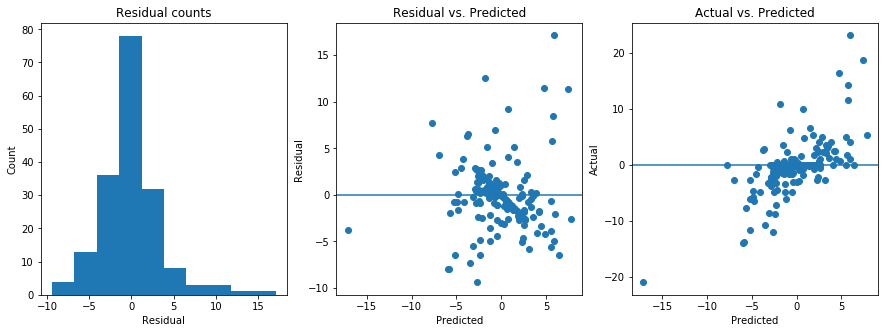

In [56]:
model_residuals(regr_optimized)

Linear regression shows mediocre accruacy at 44%.

### Ridge Regularization

In [57]:
ridge_default = linear_model.Ridge() 

In [58]:
model_results(ridge_default)

Cross Validation Scores [-0.09606703  0.36306463 -0.05508063  0.15266085 -0.0412253 ]

R-squared:  0.4301733183461206


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.961283528718849e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.2782104294683385e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.702254686623826e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.

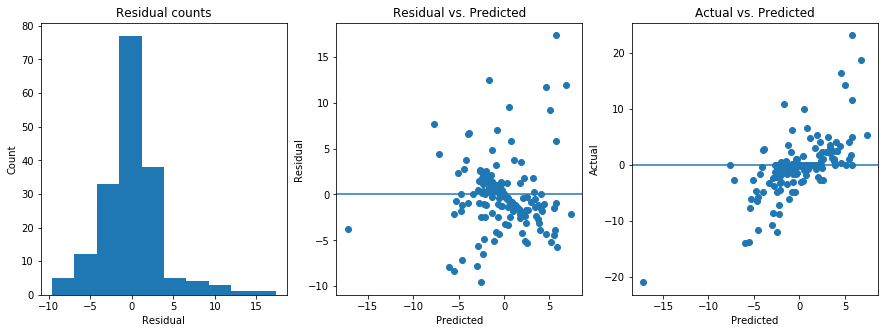

In [59]:
model_residuals(ridge_default)

In [60]:
# set parameters for tuning with grid search cv
parameters = {'alpha': [1, 20],
    'normalize': [True, False]}
ridge = linear_model.Ridge() 
ridge_cv = GridSearchCV(ridge, parameters)

In [61]:
ridge_cv.fit(X, Y)
ridge_cv.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.360425448469953e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.749300973160735e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1005062416750934e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.

{'alpha': 1, 'normalize': True}

In [62]:
ridge_optimized = linear_model.Ridge(alpha=1, normalize=True)

In [63]:
model_results(ridge_optimized)

Cross Validation Scores [-0.01428006  0.25290832  0.30901386  0.14974867  0.1822854 ]

R-squared:  0.3269004671247101


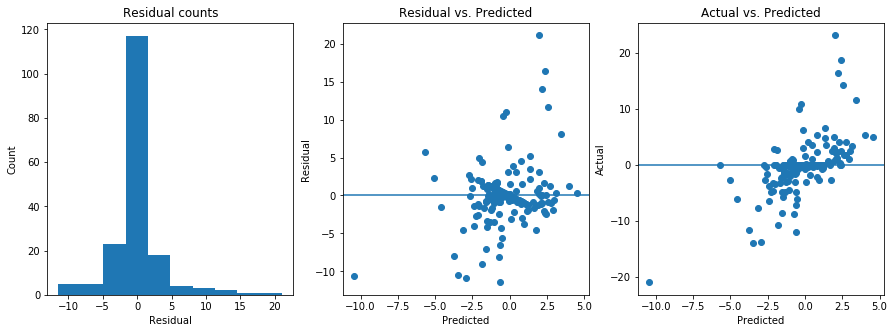

In [64]:
model_residuals(ridge_optimized)

Linear regression with Ridge regularization doesn't improve accuracy, but the tuned version does help to improve consistency by minimizing residuals.

### Lasso Regularization

In [65]:
lasso_default = linear_model.Lasso()

In [66]:
model_results(lasso_default)

Cross Validation Scores [ 0.05639516  0.31894596 -0.23072304  0.25578651  0.05714138]

R-squared:  0.371277239859635


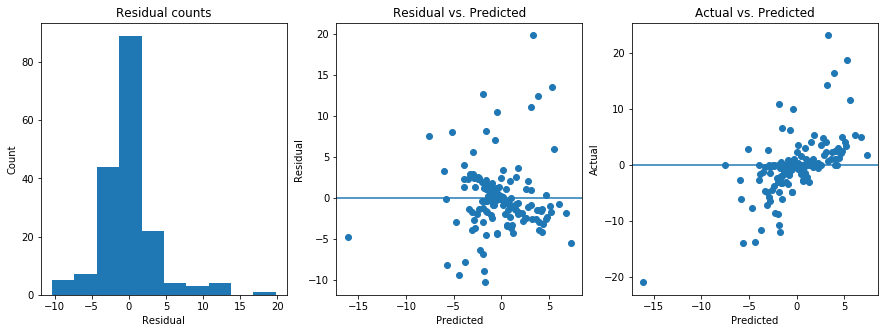

In [67]:
model_residuals(lasso_default)

Default settings on regression with lasso regulariztion results in low accuracy and noticeable residuals.

In [68]:
# set parameters for tuning with grid search cv
# defaults normalize=False
parameters = {'alpha': [0.1, 1, 10, 100, 1000, 10000],
    'normalize': [True, False],
    'fit_intercept': [True, False]}
lasso = linear_model.Lasso()
lasso_cv = GridSearchCV(lasso, parameters)

In [69]:
lasso_cv.fit(X, Y)
lasso_cv.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

{'alpha': 1000, 'fit_intercept': True, 'normalize': False}

In [70]:
lasso_optimized = linear_model.Lasso(alpha=1000, fit_intercept=True, normalize=False)

In [71]:
model_results(lasso_optimized)

Cross Validation Scores [0.05981701 0.03878103 0.22962293 0.11027346 0.12381552]

R-squared:  0.14378709765563347


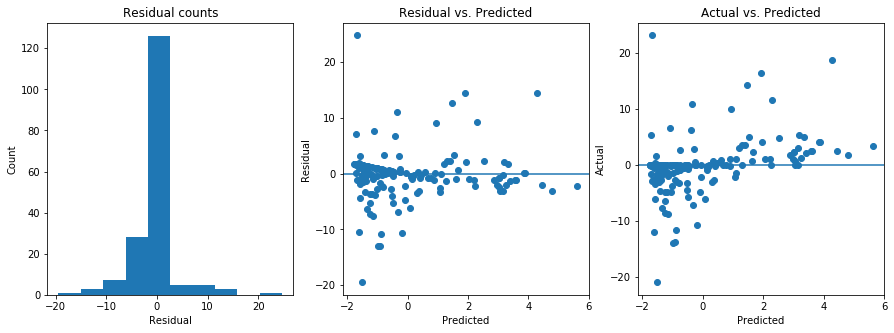

In [72]:
model_residuals(lasso_optimized)

This optimized version of regression with lasso regularization has improved the residuals, but the R-squared score is very low.

## SVM

In [73]:
svr_default = SVR()

In [74]:
model_results(svr_default)

Cross Validation Scores [-0.03804156 -0.0568228  -0.0325652  -0.03330477 -0.00203819]

R-squared:  0.19689211704115772


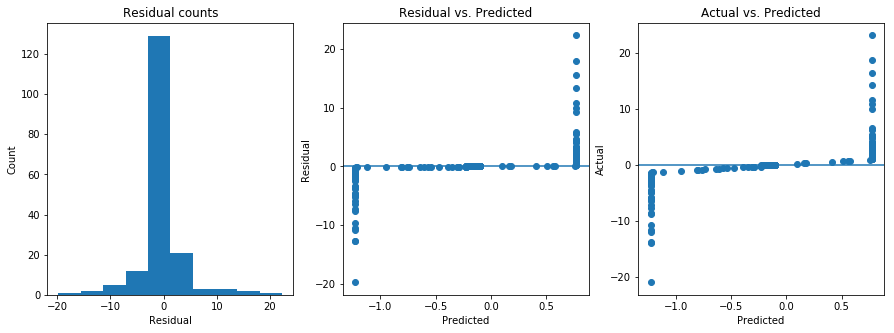

In [75]:
model_residuals(svr_default)

Default settings of a support vector machine regression shows a low R-squared score, but with good accuracy control.

In [76]:
# set parameters for tuning with grid search cv
parameters = {'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]}
svr = SVR()
svr_cv = GridSearchCV(svr, parameters)

In [77]:
svr_cv.fit(X, Y)
svr_cv.best_params_

{'C': 1, 'epsilon': 0.1}

In [78]:
# set parameters for tuning with grid search cv
parameters = {'C': [1, 2, 3, 4, 5],
    'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]}
svr = SVR()
svr_cv = GridSearchCV(svr, parameters)

In [79]:
svr_cv.fit(X, Y)
svr_cv.best_params_

{'C': 4, 'epsilon': 0.1}

In [80]:
svr_optimized = SVR(C=4, epsilon=0.1)

In [81]:
model_results(svr_optimized)

Cross Validation Scores [-0.04292906 -0.06187712 -0.04561288 -0.03110326 -0.00449469]

R-squared:  0.5671185251389145


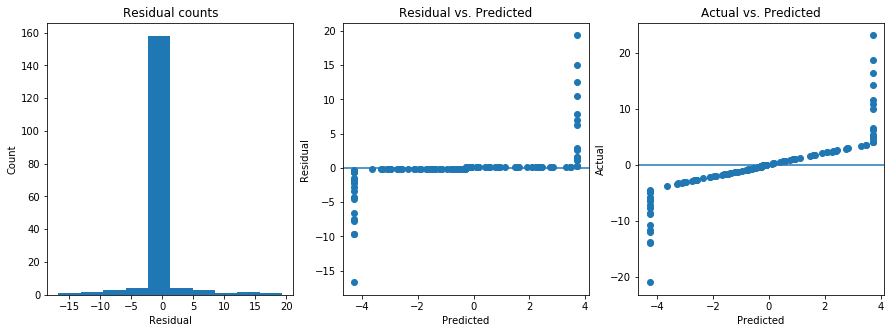

In [82]:
model_residuals(svr_optimized)

## Decision Tree

In [135]:
tree_default = DecisionTreeRegressor()

In [140]:
model_results(tree_default)

Cross Validation Scores [-0.55050374 -0.14730754 -0.62030765 -0.02826693 -0.24563891]

R-squared:  1.0


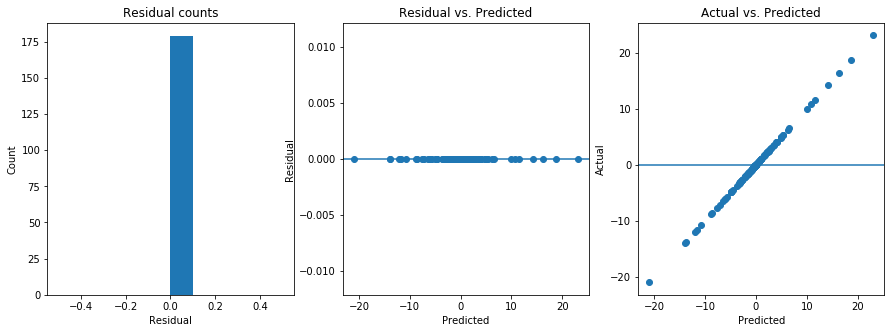

In [137]:
model_residuals(tree_default)

In [147]:
parameters = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10]}
tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree, parameters)

In [158]:
tree_cv.fit(X, Y)
tree_cv.best_params_

{'max_depth': 4, 'max_features': 5}

In [159]:
tree_optimized = DecisionTreeRegressor(max_depth=4, max_features=5)

In [160]:
model_results(tree_optimized)

Cross Validation Scores [-0.21420304 -0.00925485 -0.4949203  -0.70936656  0.386914  ]

R-squared:  0.638608182674629


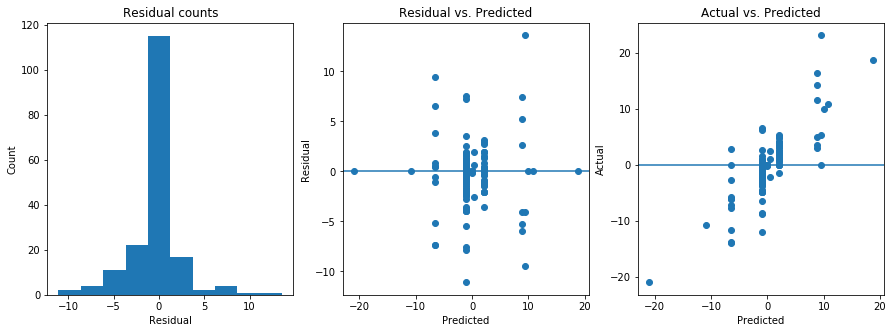

In [161]:
model_residuals(tree_optimized)

In [162]:
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 10]}
tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree, parameters)

In [163]:
tree_cv.fit(X, Y)
tree_cv.best_params_

{'max_depth': 4}

In [164]:
tree_optimized = DecisionTreeRegressor(max_depth=4)

In [165]:
model_results(tree_optimized)

Cross Validation Scores [-0.16573576  0.07274863 -0.321853    0.18016099 -0.03611313]

R-squared:  0.7135114639828095


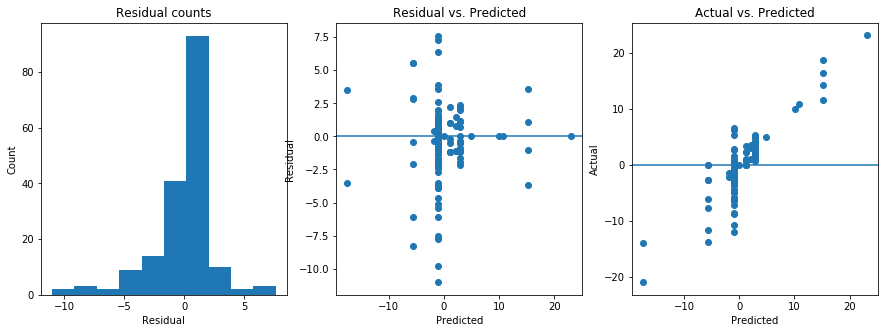

In [167]:
model_residuals(tree_optimized)

## Random Forest Regression

In [83]:
rfr_default = RandomForestRegressor()

In [84]:
model_results(rfr_default)

Cross Validation Scores [-0.07603296  0.22755337  0.19164887  0.2549009  -0.0766199 ]

R-squared:  0.828883446926841


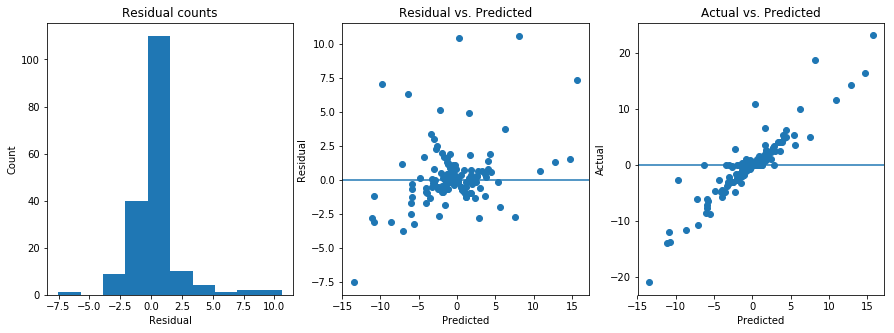

In [85]:
model_residuals(rfr_default)

In [86]:
parameters = {'n_estimators': [50, 100, 200, 400],
    'max_features': [1, 2, 5, 10, 17],
    'max_depth' : [1, 2, 10, 15]}
rfr = RandomForestRegressor()
rfr_cv = GridSearchCV(rfr, parameters)

In [87]:
rfr_cv.fit(X, Y)
rfr_cv.best_params_

{'max_depth': 10, 'max_features': 1, 'n_estimators': 400}

In [90]:
rfr_optimized = RandomForestRegressor(max_depth= 10, max_features= 1, n_estimators= 400)

In [91]:
model_results(rfr_optimized)

Cross Validation Scores [-0.02958601  0.27342587  0.4103674   0.25644401  0.15963637]

R-squared:  0.849014568500558


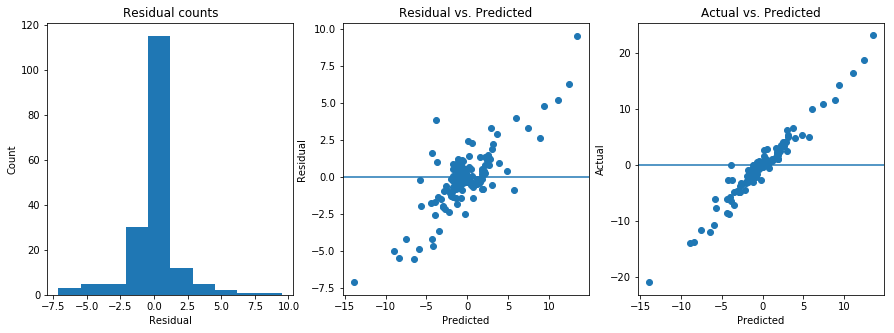

In [92]:
model_residuals(rfr_optimized)

Minimized residual (range is about 15) and fit is good, with an R-squared of 88%.
Residuals are better with the manually fitted model, with a range of just over 10.

## Gradient Boosting

In [93]:
gbr_default = ensemble.GradientBoostingRegressor()

In [94]:
model_results(gbr_default)

Cross Validation Scores [-0.00571457  0.42103061  0.02630646  0.1474085   0.16708153]

R-squared:  0.9756970359589362


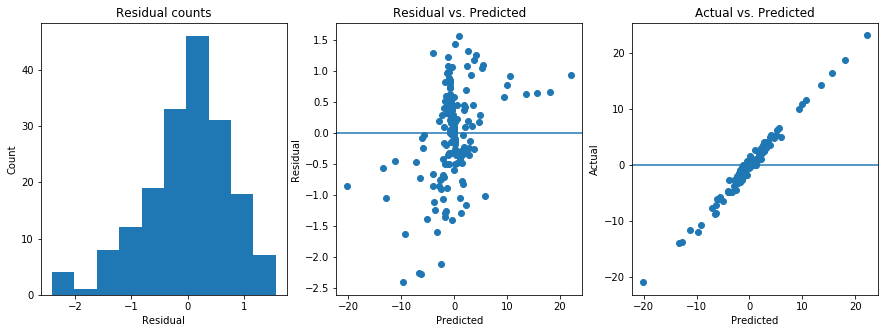

In [95]:
model_residuals(gbr_default)

In [96]:
parameters = {'n_estimators': [50, 100, 200, 400, 600],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth' : [1, 3, 6, 10],
    'loss' : ['ls', 'lad']}
gbr = ensemble.GradientBoostingRegressor()
gbr_cv = GridSearchCV(gbr, parameters)

In [97]:
gbr_cv.fit(X, Y)
gbr_cv.best_params_

{'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 10, 'n_estimators': 50}

In [98]:
gbr_optimized = ensemble.GradientBoostingRegressor(learning_rate=0.1, max_depth=10, n_estimators=50, loss='lad')

In [101]:
model_results(gbr_optimized)

Cross Validation Scores [0.02979684 0.33971199 0.24477882 0.30673655 0.08789171]

R-squared:  0.8619998229109532


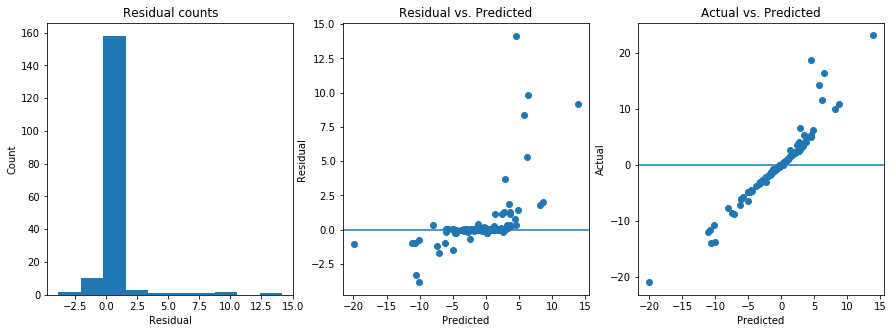

In [102]:
model_residuals(gbr_optimized)